In [ ]:
!pip install mmcv-full

     |████████████████████████████████| 324 kB 4.0 MB/s 
     |████████████████████████████████| 185 kB 66.7 MB/s 
  Created wheel for mmcv-full: filename=mmcv_full-1.3.14-cp37-cp37m-linux_x86_64.whl size=31620701 sha256=962c108db6c24c855ec074f8afae9f188cf7c38c2e5189fdc5023563999386db
  Stored in directory: /root/.cache/pip/wheels/5e/54/62/69c99dc3c9937bca64126f81cbe315ae6c8e6e98c43fa7392d
Successfully built mmcv-full


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 21102, done.
remote: Total 21102 (delta 0), reused 0 (delta 0), pack-reused 21102
Receiving objects: 100% (21102/21102), 24.82 MiB | 22.65 MiB/s, done.
Resolving deltas: 100% (14757/14757), done.


In [ ]:
%cd mmdetection

/content/mmdetection


In [ ]:
!python setup.py install

In [ ]:
!ls

build	      docker	   mmdet	    README_zh-CN.md   setup.py
CITATION.cff  docs	   mmdet.egg-info   requirements      tests
configs       docs_zh-CN   model-index.yml  requirements.txt  tools
demo	      LICENSE	   pytest.ini	    resources
dist	      MANIFEST.in  README.md	    setup.cfg


In [ ]:
!mkdir checkpoints

In [ ]:
!wget -O /content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth

--2021-10-04 06:56:05--  http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r101_fpn_1x_coco/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.25
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 254089599 (242M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’

/content/mmdetectio 100%[===================>] 242.32M  10.9MB/s    in 22s     

2021-10-04 06:56:27 (11.0 MB/s) - ‘/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth’ saved [254089599/254089599]



In [ ]:
#!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth https://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

In [ ]:
!ls -la ./checkpoints/

total 248144
drwxr-xr-x  2 root root      4096 Oct  4 06:56 .
drwxr-xr-x 19 root root      4096 Oct  4 06:56 ..
-rw-r--r--  1 root root 254089599 Aug 28  2020 mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [ ]:
from mmdet.apis import init_detector, inference_detector, show_result_pyplot

In [ ]:
config_file = '/content/mmdetection/configs/mask_rcnn/mask_rcnn_r101_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth'

# config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
# checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
model = init_detector(config_file, checkpoint_file, device='cuda:0')

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/builder.py:17: UserWarning: ``build_anchor_generator`` would be deprecated soon, please use ``build_prior_generator`` 
  '``build_anchor_generator`` would be deprecated soon, please use '


Use load_from_local loader


In [ ]:
%cd mmdetection/
img = 'demo/demo.jpg'
result = inference_detector(model, img)

/content/mmdetection


/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/pyt

In [ ]:
type(result)

tuple

In [ ]:
len(result)

2

In [ ]:
len(result[0]), len(result[1])

(80, 80)

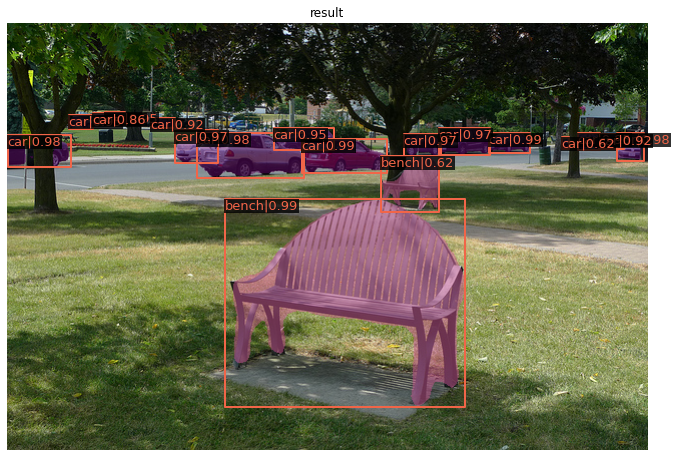

In [ ]:
show_result_pyplot(model, img, result, score_thr=0.6)

In [ ]:
result[2]

array([[6.09650024e+02, 1.13805901e+02, 6.34511658e+02, 1.36951904e+02,
        9.88766015e-01],
       [4.81773712e+02, 1.10480995e+02, 5.22459717e+02, 1.30407104e+02,
        9.87157285e-01],
       [1.01821303e+00, 1.12144722e+02, 6.04374390e+01, 1.44173752e+02,
        9.83206093e-01],
       [2.94623749e+02, 1.17035233e+02, 3.78022675e+02, 1.50550873e+02,
        9.71326888e-01],
       [3.96328979e+02, 1.11203323e+02, 4.32490540e+02, 1.32729263e+02,
        9.67802048e-01],
       [5.90976318e+02, 1.10802658e+02, 6.15401917e+02, 1.26493553e+02,
        9.59414959e-01],
       [2.67582001e+02, 1.05686005e+02, 3.28818756e+02, 1.28226547e+02,
        9.59253430e-01],
       [1.66856735e+02, 1.08006599e+02, 2.19100693e+02, 1.40194809e+02,
        9.56841230e-01],
       [1.89769592e+02, 1.09801109e+02, 3.00310822e+02, 1.53781891e+02,
        9.51012254e-01],
       [4.29822510e+02, 1.05655380e+02, 4.82741547e+02, 1.32376724e+02,
        9.45850074e-01],
       [5.55000916e+02, 1.0978

In [ ]:
import cv2
import mmcv

video_reader = mmcv.VideoReader("/content/mmdetection/demo/demo.mp4")
video_writer = None

fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter("/content/mmdetection/demo/demo_out.mp4", fourcc, 
                               video_reader.fps, (video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
  result = inference_detector(model, frame)
  frame = model.show_result(frame, result, score_thr=0.4)
  video_writer.write(frame)

if video_writer:
  video_writer.release()

[                                                  ] 0/67, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:324: UserWarning: ``grid_anchors`` would be deprecated soon. Please use ``grid_priors`` 
  warnings.warn('``grid_anchors`` would be deprecated soon. '
/usr/local/lib/python3.7/dist-packages/mmdet-2.17.0-py3.7.egg/mmdet/core/anchor/anchor_generator.py:361: UserWarning: ``single_level_grid_anchors`` would be deprecated soon. Please use ``single_level_grid_priors`` 
  '``single_level_grid_anchors`` would be deprecated soon. '


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 67/67, 2.5 task/s, elapsed: 27s, ETA:     0s


In [ ]:
                    {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                    11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                    21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                    31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                    41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                    51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                    61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                    71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [16]:
ls -la ./checkpoints/

total 248144
drwxr-xr-x  2 root root      4096 Oct  4 06:56 ./
drwxr-xr-x 19 root root      4096 Oct  4 06:56 ../
-rw-r--r--  1 root root 254089599 Aug 28  2020 mask_rcnn_r101_fpn_1x_coco_20200204-1efe0ed5.pth


In [15]:
%pwd

'/content/mmdetection'